In [ ]:
!pip install tweepy

In [ ]:
import tweepy
# from tweepy import OAuthHandler
# from tweepy import API
# from textblob import TextBlob
# from wordcloud import WordCloud
import configparser
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns


**Twitter Trend Analysis of a particular place**

In [ ]:
consumer_keys= "r1HX5DwY8ijJk5xeVV5O88hf3"
consumer_secret= "ObyoZecOaClWExYWfMi46mB6xZouq1ZmMDaoCS6xYI4lhljp9t"
access_token= "3032908566-UeKqzHNMtLnmbcmeTRjs5RO8Cy9dUMnxD7LrSgF"
accesstoken_secret= "9MEBYfxif7eueYnJ5ezej71FNcKXA56aMIetqOEIg5zDU"

In [ ]:
auth = tweepy.OAuthHandler(consumer_keys,consumer_secret)
auth.set_access_token(access_token,accesstoken_secret)
api= tweepy.API(auth)

# **Twitter trend analysis (TTA)**
TTA takes up the data from twitter using the library 'tweepy'. And then, performs an analysis on the twitter data based on the tweet counts to come up with the twitter trending data. The tweet trend can be different in different countries. So, if you want to have a look on the twitter trends in your country, you need a "WOEID". You can access it here. (https://www.findmecity.com/)

## **What is included in this notebook?**
In this notebook, you can view the twitter trend analysis on various regions:
1.   World Tweets Data
2.   Multiple countries separate twitter trend data
3.   Multiple countries twitter trends in a single frame
4.   Home page public tweets



### Twitter trend of the world
You can use the WOEID as 1 for the twitter trend data of the world.


In [ ]:
world_woe_id= 1
trend_result=api.trends_place(world_woe_id)


These are the trend results of the world tweets for today.

In [ ]:
trend_result

[{'as_of': '2022-02-18T09:34:00Z',
  'created_at': '2022-02-17T03:35:05Z',
  'locations': [{'name': 'Worldwide', 'woeid': 1}],
  'trends': [{'name': '#StormEunice',
    'promoted_content': None,
    'query': '%23StormEunice',
    'tweet_volume': 82605,
    'url': 'http://twitter.com/search?q=%23StormEunice'},
   {'name': '#TarkanYalnızDeğildir',
    'promoted_content': None,
    'query': '%23TarkanYaln%C4%B1zDe%C4%9Fildir',
    'tweet_volume': 16079,
    'url': 'http://twitter.com/search?q=%23TarkanYaln%C4%B1zDe%C4%9Fildir'},
   {'name': '#Gitcek',
    'promoted_content': None,
    'query': '%23Gitcek',
    'tweet_volume': 35730,
    'url': 'http://twitter.com/search?q=%23Gitcek'},
   {'name': '#日曜日はおうちde物産展',
    'promoted_content': None,
    'query': '%23%E6%97%A5%E6%9B%9C%E6%97%A5%E3%81%AF%E3%81%8A%E3%81%86%E3%81%A1de%E7%89%A9%E7%94%A3%E5%B1%95',
    'tweet_volume': None,
    'url': 'http://twitter.com/search?q=%23%E6%97%A5%E6%9B%9C%E6%97%A5%E3%81%AF%E3%81%8A%E3%81%86%E3%81%A1de%E7%

In [ ]:
name_list=[]
tweets_list=[]
for trend in trend_result[0]["trends"][:10]:
  if trend["tweet_volume"]:
    name_list.append(trend["name"])
    tweets_list.append(trend["tweet_volume"])

In [ ]:
name=np.array(name_list)
tweets=np.array(tweets_list)

In [ ]:
name

array(['#StormEunice', '#TarkanYalnızDeğildir', '#Gitcek', 'Wordle 244 X',
       '#FridayFeeling', 'OUR LOVE FOR SUNGHOON'], dtype='<U21')

In [ ]:
tweets

array([82605, 16079, 35730, 10423, 16002, 44255])

In [ ]:
k,v=name,tweets
pd.DataFrame(v,k)

,0
#StormEunice,82605
#TarkanYalnızDeğildir,16079
#Gitcek,35730
Wordle 244 X,10423
#FridayFeeling,16002
OUR LOVE FOR SUNGHOON,44255


### **1. World Tweets trending data**

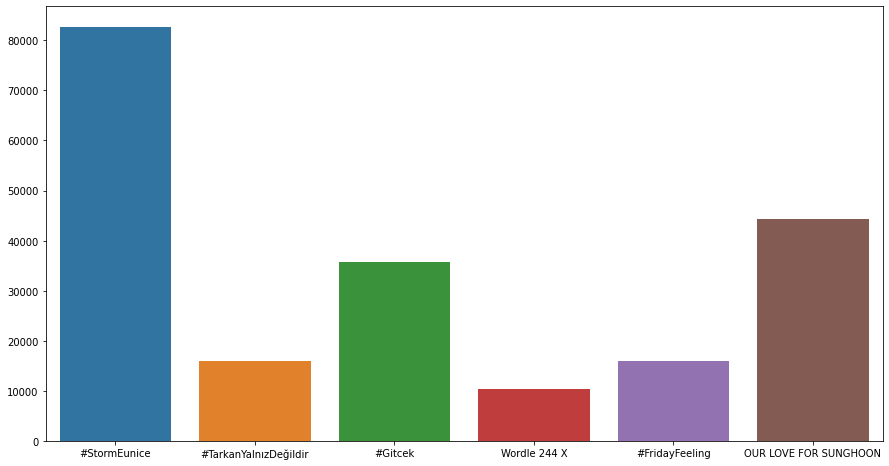

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x=name,y=tweets)

### Twitter trends in various other regions by reading their respective WOEID

In [ ]:
datas=pd.read_csv("woeid.csv")

In [ ]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   LOCALITY        8 non-null      object
 1   STATE/PROVINCE  8 non-null      object
 2   COUNTRY         8 non-null      object
 3   WOE ID          8 non-null      int64 
dtypes: int64(1), object(3)
memory usage: 384.0+ bytes


In [ ]:
datas.head(10)

,LOCALITY,STATE/PROVINCE,COUNTRY,WOE ID
0,New York,New York,US,2459115
1,Los Angeles,Los Angeles,US,2442047
2,Toronto,Toronto,CA,4118
3,Sydney,Sydney,AU,1105779
4,London,Greater London,GB,44418
5,Madrid,Madrid,ES,766273
6,Rome,Roma,IT,721943
7,Paris,Paris,FR,615702


In [ ]:
datas.columns

Index(['LOCALITY', 'STATE/PROVINCE', 'COUNTRY', 'WOE ID'], dtype='object')

### **2. Multiple countries twitter trends in a single frame**

### Looking at all the datas in a single frame.

In [ ]:
nm_list=[]
tw_list=[]
country_data=datas['WOE ID'].head()
for country in country_data:
  # print(country)
  trend_rt=api.trends_place(country)
  for trends in trend_rt[0]["trends"][:5]:
    if trends["tweet_volume"]:
      nm_list.append(trends["name"])
      tw_list.append(trends["tweet_volume"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


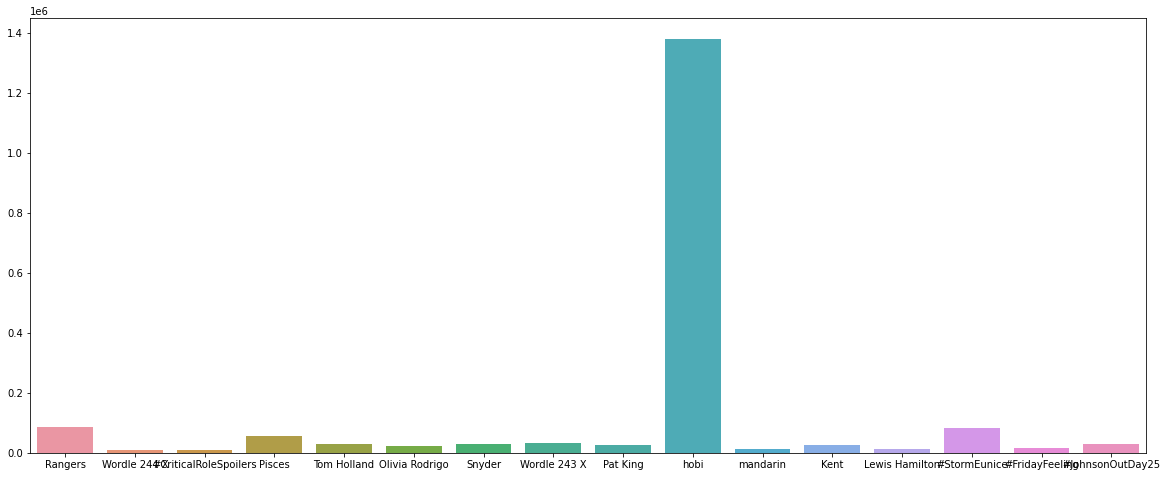

In [ ]:
name_con=np.array(nm_list)
tweets_con=np.array(tw_list)
plt.figure(figsize=(20,8))
sns.barplot(name_con,tweets_con)

### **3. Multiple countries separate twitter trend data**

Twitter trends in multiple nations is plotted in a barchart to see the popular tweets in various countries.

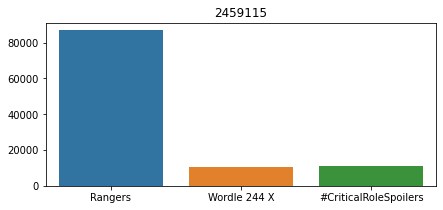

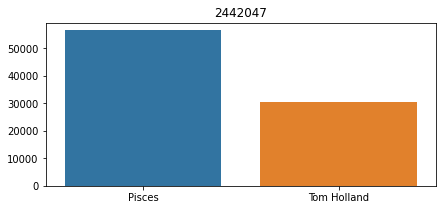

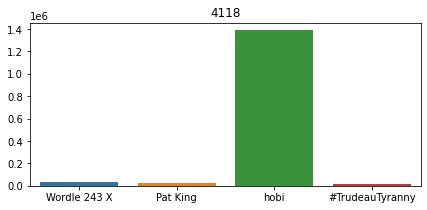

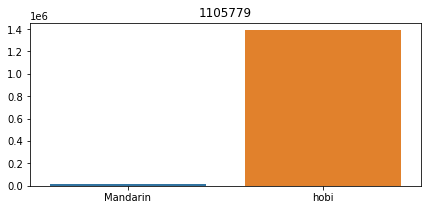

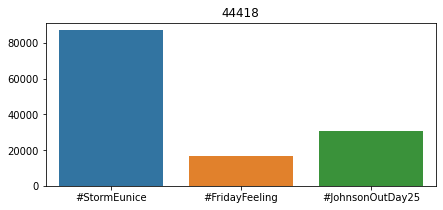

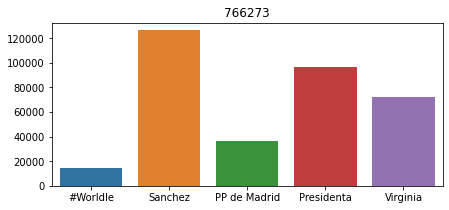

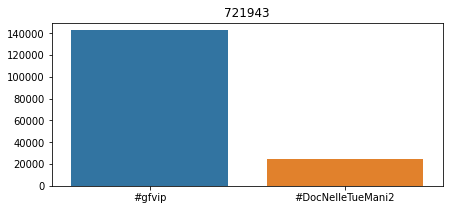

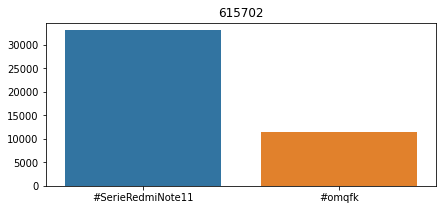

In [ ]:
nm_list=[]
tw_list=[]
country_data=datas['WOE ID']
for tweets_cont in country_data:
  nm_list=[]
  tw_list=[]

  trend_rt=api.trends_place(tweets_cont)
  for trendss in trend_rt[0]["trends"][:5]:
    if trendss["tweet_volume"]:
      nm_list.append(trendss["name"])
      tw_list.append(trendss["tweet_volume"])
  name1=np.array(nm_list)
  tweets1=np.array(tw_list)
  c,d=name1,tweets1
  pd.DataFrame(d,c)
  plt.figure(figsize=(7,3))

  sns.barplot(x=c,y=d)
  plt.title(tweets_cont)



### **4. Home page public tweets**

### Extracting the public tweets from twitter

In [ ]:
public_tweets=api.home_timeline()
for tweet in public_tweets:
  # print(tweet["name"])
  print(tweet.text)
  print(tweet.retweet_count)

Elizabeth Hurley stuns in plunging gown with gorgeous back detailing at Joan Collins' bash https://t.co/1Gj1CsEVKh
0
RT @votevets: When we tell you Republicans hate Veterans, we're not lying. They talk a good game, but their votes speak louder than words.…
1311
A safe and inclusive environment helps every young girl thrive.

UNICEF's "Supporting Girls to Thrive" programme is… https://t.co/epznLgjKf8
11
Lorraine reveals her plans to get fit and healthy again after going up two dress sizes in lockdown 👗 https://t.co/sDNnXUXtni
0
Dear Friday,

I’m so glad we are back together now.

I’m really sorry you had to see me with Monday-Thursday but I… https://t.co/ortXyc2Rdx
26
Looking for someone who can write a story to go with it in exactly 4 words. No more, no less. 

If you're up for it… https://t.co/Q3N9AQrfEV
2
Kate Garraway's family home is a retreat for her husband Derek – photos https://t.co/rFf0B1w8DY
0
Did you know that two royal heirs can never fly on the same flight? Or that every r

In [ ]:
# cursor=tweepy.Cursor(api.user_timeline,id="realdonaldmap",tweet_mode="extended").items(1)

In [ ]:
# for i in cursor:
#   print(i)

Status(_api=<tweepy.api.API object at 0x7f988aac9c50>, _json={'created_at': 'Fri Feb 18 09:00:03 +0000 2022', 'id': 1494597568537497601, 'id_str': '1494597568537497601', 'full_text': 'BOTSWANA!', 'truncated': False, 'display_text_range': [0, 9], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1266413898426716162, 'id_str': '1266413898426716162', 'name': 'Donald Trump Tweets a Country Every Hour', 'screen_name': 'realdonaldmap', 'location': '', 'description': 'Donald Trump Tweets a Country Every Hour. This is a parody account and is by no means related to Mr. President. Created by @ronasherov', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 21338, 'frien